# K-Means Algorithm

## The Clustering Problem

**K-Means** is an unsupervised machine learning algorithm used for clustering.

**Clustering** involves grouping or segmenting a dataset into clusters, where observations in different groups are dissimilar, and those within the same group are similar. Therefore, **clustering** implies understanding what it means for observations to be similar or dissimilar.

To express the problem mathematically, let's assume we want to cluster a set of $N$ observations $\{ 1,2, \dots, N \}$ into $K$ ($\leq N$) clusters $C_1, C_2, \dots, C_K$. Two properties should be satisfied:

* Each observation must belong to at least one of the $K$ groups, i.e.:
  $$
  C_1 \cup C_2 \cup \cdots \cup C_K = \{ 1,2, \dots, N \}
  $$
* No observation can belong to more than one group, i.e., there should be no intersection between clusters:
  $$
  C_k \cap C_{k'} = \emptyset \;\;\; \forall k \neq k'
  $$

If we define the within-cluster variation $W(C_k)$ as a measure evaluating how different the observations within the $k$-th cluster are, the problem is reduced to:

$$
\min_{\{C_1, C_2, \dots, C_K\}}\sum_{k = 1}^K W(C_k) = \min_{\{C_1, C_2, \dots, C_K\}}[W(C_1) + W(C_2) + \cdots + W(C_K)
]$$

In other words, the goal of K-Means is to divide observations into $K$ groups in a way that minimizes the sum of individual variations within each group across all $K$ groups.

## Within-cluster variation

The quantity $W(C_k)$ can be understood as a **distance** between observations, and there are different ways to define it depending on the nature of the data and the analysis objectives.

### Manhattan Distance

The Manhattan distance (named after the grid-like layout of most streets on the island of Manhattan) is also known as the $L_1$ distance.

Given two points $p$ and $q$ with coordinates $(p_1, p_2, \dots, p_N)$ and $(q_1, q_2, \dots, q_N)$ respectively, the Manhattan distance is defined as:

$$d_1(p,q) = \sum_{i=1}^N |p_i - q_i|$$

**Example**

Let's consider two points $p = (2,3)$ and $q = (5,7)$ $\Rightarrow d_1 = |p_1 - q_1| + |p_2 - q_2| = |2 - 5| + |3 - 7| = 3 + 4 = 7$

In [1]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Avoid code suggestions
import warnings
warnings.filterwarnings('ignore')

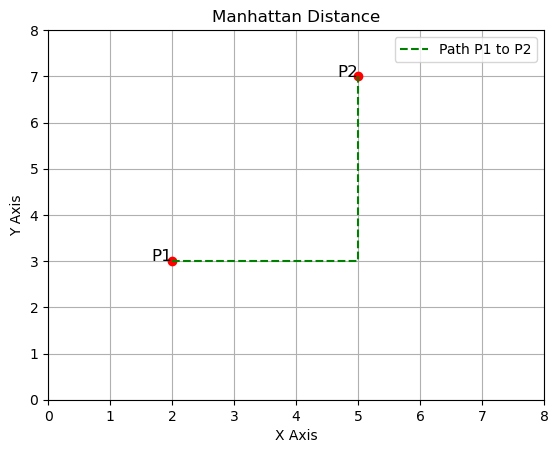

In [2]:
# Define the points
x = [2, 5]
y = [3, 7]

# Plot the points
plt.plot(x, y, 'ro')

# Label the points
plt.text(x[0], y[0], 'P1', fontsize=12, ha='right')
plt.text(x[1], y[1], 'P2', fontsize=12, ha='right')

# Plot the path following the Manhattan distance
plt.plot([x[0], x[1], x[1]], [y[0], y[0], y[1]], 'g--', label='Path P1 to P2')

# Graph settings
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Manhattan Distance')

# Add legend
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

### Chebyshev Distance

Given two points $p$ and $q$ with coordinates $(p_1, p_2, \dots, p_N)$ and $(q_1, q_2, \dots, q_N)$ respectively, the Chebyshev distance is defined as:

$$
D_C(p,q) = \max_i(|p_i - q_i|)
$$

In 2D, in plane geometry, if the points $p$ and $q$ have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Chebyshev distance is:

$$
D_C(p,q) = \max(|x_2 - x_1|, |y_2 - y_1|)
$$

**Example**

Let's consider two points $p = (3,4)$ and $q = (7,1)$ $\Rightarrow D_C = \max(|7 - 3|, |1 - 4|) = \max(4, 3) = 4$

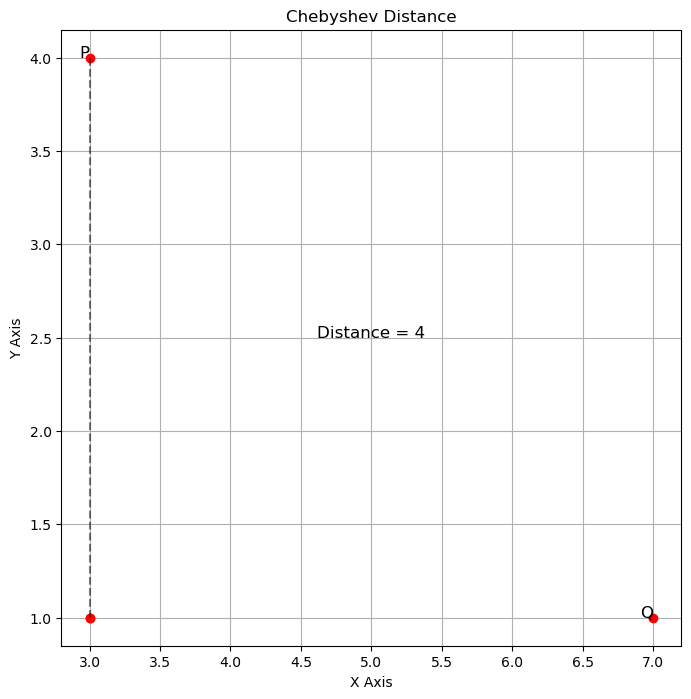

In [3]:
# Define points P and Q
P = (3, 4)
Q = (7, 1)

# Calculate the Chebyshev distance
d = max(abs(Q[0] - P[0]), abs(Q[1] - P[1]))

# Create the plot
plt.figure(figsize=(8, 8))

# Plot points P and Q
plt.plot([P[0], P[0]], [P[1], Q[1]], 'ro')
plt.plot([P[0], Q[0]], [Q[1], Q[1]], 'ro')
plt.text(P[0], P[1], 'P', fontsize=12, ha='right')
plt.text(Q[0], Q[1], 'Q', fontsize=12, ha='right')

# Plot the vertical line (distance)
plt.plot([P[0], P[0]], [P[1], Q[1]], 'k--', alpha=0.5)

# Add text with the distance
plt.text((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2, f'Distance = {d}', fontsize=12, ha='center')

# Configure the plot
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Chebyshev Distance')

# Show the plot
plt.grid(True)
plt.show()

### Euclidean Distance

The Euclidean distance between two points $X = (x_1, x_2, \dots, x_N)$ and $Y = (y_1, y_2, \dots, y_N)$ $\in \mathbb{R}^N$ is defined as:

$$
d_E(X,Y) = \sqrt{\sum_{i = 1}^n (x_i - y_i)^2 }
$$

In **2D**, if points X and Y have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Euclidean distance is:

$$
d_E(X,Y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}
$$

**Example**

Let's consider two points $X = (1,2)$ and $Y = (4,6)$. For $p=3$, we have $d_E(X, Y) = \sqrt{(1 - 4)^2 + (2 - 6)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

### Minkowski Distance

The Minkowski distance of order $p$ (where $p$ is an integer) between two points $X = (x_1, x_2, \dots, x_N)$ and $Y = (y_1, y_2, \dots, y_N)$ $\in \mathbb{R}^N$ is defined as:

$$
D_M(X,Y) = \left( \sum_{i = 1}^N |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

In 2D, if points X and Y have Cartesian coordinates $(x_{1},y_{1})$ and $(x_{2},y_{2})$ respectively, their Minkowski distance is:

$$
D_M(X,Y) = \left( |x_1 - y_1|^p + |x_2 - y_2|^p \right)^{\frac{1}{p}}
$$

When $p = 2$, $D_M(X,Y) = d_E(X,Y)$. Minkowski distance is a generalization of Euclidean distance.

**Example**

Let's consider two points $X = (1,2)$ and $Y = (4,6)$. For $p=3$, we have $D_M(X, Y) = \left( |1 - 4|^3 + |2 - 6|^3 \right)^{\frac{1}{3}} = \sqrt[3]{27 + 64} = \sqrt[3]{91} \approx 4.497$

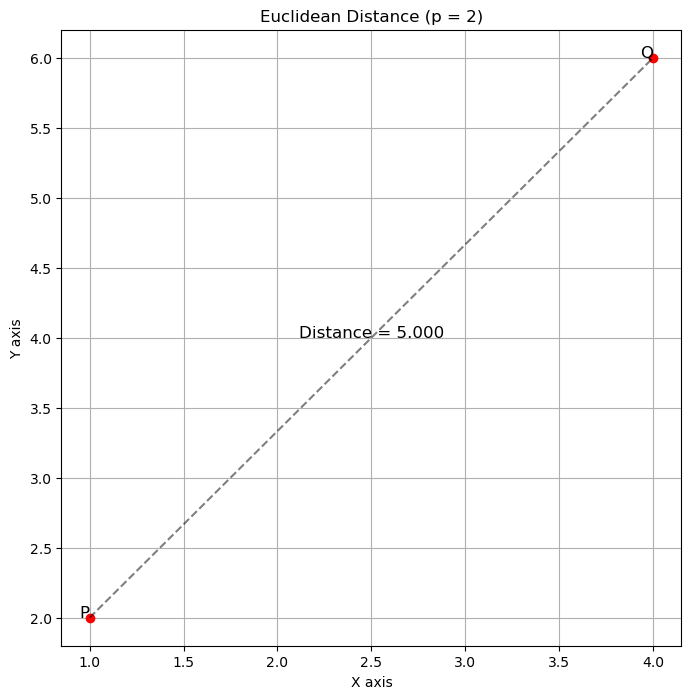

In [4]:
# Define points P and Q
P = (1, 2)
Q = (4, 6)
p = 2

# Calculate Euclidean distance
d = ((Q[0] - P[0])**2 + (Q[1] - P[1])**2)**0.5

# Create the chart
plt.figure(figsize=(8, 8))

# Draw points P and Q
plt.plot([P[0], Q[0]], [P[1], Q[1]], 'ro')
plt.text(P[0], P[1], 'P', fontsize=12, ha='right')
plt.text(Q[0], Q[1], 'Q', fontsize=12, ha='right')

# Draw a line connecting the points (optional)
plt.plot([P[0], Q[0]], [P[1], Q[1]], 'k--', alpha=0.5)

# Add a text with the distance
plt.text((P[0] + Q[0]) / 2, (P[1] + Q[1]) / 2, f'Distance = {d:.3f}', fontsize=12, ha= 'center')

# Configure the graph
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title(f'Euclidean Distance (p = {p})')

# Show the graph
plt.grid(True)
plt.show()

The most commonly used distance in the **K-Means algorithm** is the **Euclidean** distance and it is what we will use from now on.

## Clustering by Brute Force

Using the Euclidean distance, we could pose the problem as follows:

Given a set of observations $(\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N)$ where each observation is a real vector of $p$ dimensions, we could divide the set into $K$ cluster and for each of those clusters calculate the centroids $\boldsymbol{\mu}_k = \frac{1}{|C_k|}\sum_{\mathbf{x} \in C_k} \mathbf{x} $, where $\frac{1}{|C_k|}$ is the number of observations in the $k$-th group. We would then seek to minimize the sum over all $K$ groups of the sum of the squares of the distances with respect to the centroid within each group. That is to say

$$
\min_{C_1, C_2, \dots, C_K}\sum _{k = 1}^K \sum _{\mathbf{x} \in C_k} || \mathbf{x} - \boldsymbol{\mu}_k||^2 = \min_{C_1, C_2, \dots, C_K}\sum_{k = 1}^K |C_k|\mathrm{Var}(C_k)
$$

**Clustering Example**

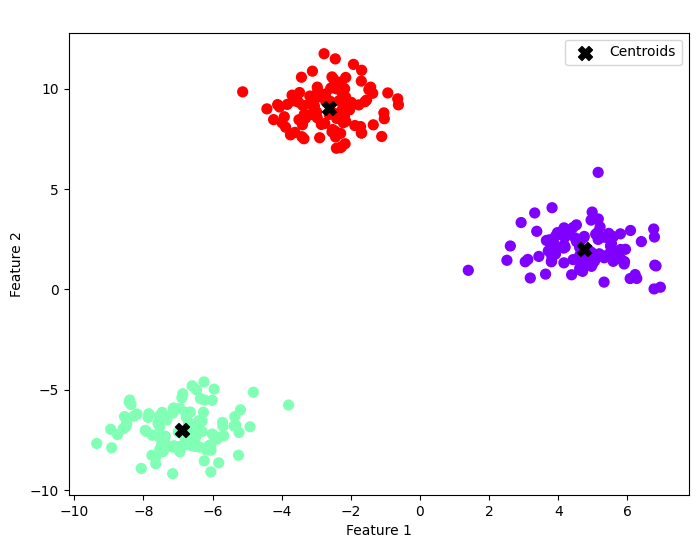

We can implement this idea using "brute force". To this end, a question one could ask in this instance is: in how many ways is it possible to assign $N$ observations to $K$ clusters? To answer this question, we can address some simple examples.

**Example 1: Case $N = 2$, $K = 2$**

In this case, we want to partition 2 objects, say $A$ and $B$, into 2 clusters. The number of ways to do this is denoted by $S(2,2)$, which is the Jain and Dubes number for $N = 2$ and $K = 2$. Since each object must be in its own cluster, there is only one way to partition them:

- $\{A\}, \{B\}$

Thus:

$$
S(2,2) = 1
$$

**Example 2: Case $N = 3$, $K = 2$**

For $N = 3$ and $K = 2$, we want to partition 3 objects, say $A$, $B$, and $C$, into 2 clusters. The possible partitions are:

- $\{A, B\}, \{C\}$
- $\{A, C\}, \{B\}$
- $\{B, C\}, \{A\}$

Thus, there are 3 distinct ways to partition 3 objects into 2 clusters:

$$
S(3,2) = 3
$$

**Example 3: Case $N = 3$, $K = 3$**

For $N = 3$ and $K = 3$, we want to partition 3 objects $A$, $B$, and $C$ into 3 clusters. Since each object must be in its own cluster, there is only one way to do this:

- $\{A\}, \{B\}, \{C\}$

Thus:

$$
S(3,3) = 1
$$

The general expression for the case of arbitrary $K$ and $N$ ($K \leq N$) is:

$$
S(N,K) = \frac{1}{K!} \sum_{i=1}^{K} (-1)^{K-i} \binom{K}{i} i^N
$$

Where $S(N,K)$ represents the number of ways to assign $N$ observations to $K$ clusters.

In [5]:
def non_empty_allocations(n, K):
    """
    Find the number of ways to assign n observations to K clusters without allowing empty clusters.

    Inputs:
        n (int): Number of observations.
        K (int): Number of clusters.

    Returns:
        int: Number of allocation forms.

    Author:
        Rodrigo J. Kang
    """
    result = 0
    for i in range(0, K+1):
        result += ((-1)**(K-i)) * math.comb(K, i) * (i**n)
    return result // math.factorial(K)

# Parameters
n = 10
K = 4

allocations_forms = non_empty_allocations(n, K)
print(f"For K={K} and n={n}, there are {allocations_forms} ways to assign observations to clusters without empty clusters.")

For K=4 and n=10, there are 34105 ways to assign observations to clusters without empty clusters.


In [6]:
import itertools

def partitions(set_, K):
    """
    This function works by recursively dividing the set, either placing the first element
    in a new subset or adding it to an existing subset.

    Inputs:
        set_ (list): A list of elements to partition.
        K (int): The number of subsets to divide the set into.

    Returns:
        list: A partition of the set into K subsets.

    Author:
        Rodrigo J. Kang
    """
    if K == 1:
        # Base case: If K is 1, the entire set goes into one partition
        yield [set_]
    elif len(set_) == K:
        # If the number of elements equals K, each element must be in its own subset
        yield [[item] for item in set_]
    elif len(set_) > K:
        # Recursive case: Partition the set by placing the first element in its own subset
        first = set_[0]
        # Case 1: Place the first element in a new subset and partition the rest into K-1 subsets
        for smaller in partitions(set_[1:], K-1):
            yield [[first]] + smaller
        # Case 2: Add the first element to an existing subset and partition the rest into K subsets
        for smaller in partitions(set_[1:], K):
            for n, subset in enumerate(smaller):
                yield smaller[:n] + [[first] + subset] + smaller[n+1:]

def partition_objects(N, K):
    """
    Generates all possible partitions of N objects into K subsets.

    Parameters:
    N (int): The number of objects to partition.
    K (int): The number of subsets to divide the objects into.

    Returns:
    list: A list of all possible partitions of N objects into K subsets.
    """
    # Represent the objects as numbers from 1 to N
    objects = list(range(1, N + 1))
    # Generate all partitions of the objects into K subsets
    partitions_list = list(partitions(objects, K))
    return partitions_list

# Example with N = 4, K = 10 => 34,105 partitios
N = 4
K = 2
result = partition_objects(N, K)
for idx, part in enumerate(result, 1):
    print(f"Partition {idx}: {part}")

Partition 1: [[1], [2, 3, 4]]
Partition 2: [[1, 2], [3, 4]]
Partition 3: [[2], [1, 3, 4]]
Partition 4: [[1, 2, 3], [4]]
Partition 5: [[2, 3], [1, 4]]
Partition 6: [[1, 3], [2, 4]]
Partition 7: [[3], [1, 2, 4]]


Then, for each of these allocations one could calculate $\sum _{k = 1}^K \sum _{\mathbf{x} \in C_k} || \mathbf{x} - \boldsymbol{\mu}_k||^2$ and select from all of them that partition that minimizes this quantity.

In [7]:
import itertools
import numpy as np

def partitions(set_, K):
    """
    Recursively generates all possible partitions of a set into K subsets.
    """
    if K == 1:
        yield [set_]
    elif len(set_) == K:
        yield [[item] for item in set_]
    elif len(set_) > K:
        first = set_[0]
        for smaller in partitions(set_[1:], K-1):
            yield [[first]] + smaller
        for smaller in partitions(set_[1:], K):
            for n, subset in enumerate(smaller):
                yield smaller[:n] + [[first] + subset] + smaller[n+1:]

def partition_objects(N, K):
    """
    Generates all possible partitions of N objects into K subsets.
    """
    objects = list(range(N))  # Indices of the points (0 to N-1)
    partitions_list = list(partitions(objects, K))
    return partitions_list

def calculate_partition_cost(partition, points, p):
    """
    Calculates the sum of squared Euclidean distances between points and their centroid for a given partition.

    Inputs:
        partition (list of lists): A partition of point indices into clusters.
        points (list of tuples): A list of points, where each point is a tuple of p dimensions.
        p (int): The number of dimensions of each point.

    Returns:
        float: The total cost (sum of squared Euclidean distances) for the partition.

    Author:
        Rodrigo J. Kang
    """
    total_cost = 0
    for cluster in partition:
        if len(cluster) > 0:
            # Extract the points in the current cluster
            cluster_points = np.array([points[i] for i in cluster])
            # Calculate the centroid of the current cluster
            centroid = np.mean(cluster_points, axis=0)
            # Calculate the sum of squared Euclidean distances to the centroid
            cost = np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
            total_cost += cost
    return total_cost

def find_best_partition(N, K, points, p):
    """
    Finds the best partition of N objects into K subsets that minimizes the sum of squared Euclidean distances.
    Prints all the partitions with their costs and selects the best one.

    Inputs:
        N (int): The number of objects to partition.
        K (int): The number of subsets.
        points (list of tuples): A list of points, where each point is a tuple of p dimensions.
        p (int): The number of dimensions of each point.

    Returns:
        tuple: The best partition and its associated cost.

    Author:
        Rodrigo J. Kang
    """
    partitions_list = partition_objects(N, K)
    best_partition = None
    min_cost = float('inf')

    # Print each partition and its cost with numbering
    print("All partitions and their costs:")
    for idx, partition in enumerate(partitions_list, 1):
        cost = calculate_partition_cost(partition, points, p)
        print(f"Partition {idx}: {partition}, Cost: {cost}")
        if cost < min_cost:
            min_cost = cost
            best_partition = partition

    return best_partition, min_cost

def generate_random_points(N, p):
    """
    Generates N random points in p-dimensional space.

    Inputs:
        N (int): The number of points to generate.
        p (int): The number of dimensions.

    Returns:
        list: A list of tuples representing the random points.

    Author:
        Rodrigo J. Kang
    """
    return np.random.rand(N, p)

# Example parameters
N = 4  # Number of points
p = 2  # Number of dimensions
K = 2  # Number of clusters

# Generate random points in p-dimensional space
points = generate_random_points(N, p)
print(f"Generated random points:\n{points}\n")

best_partition, min_cost = find_best_partition(N, K, points, p)

print("\nBest partition and its cost:")
print(f"Best partition: {best_partition}")
print(f"Minimum cost: {min_cost}")

Generated random points:
[[0.29164098 0.16144683]
 [0.02224128 0.0876471 ]
 [0.44705118 0.83723852]
 [0.97787985 0.51967901]]

All partitions and their costs:
Partition 1: [[0], [1, 2, 3]], Cost: 0.7416235062184404
Partition 2: [[0, 1], [2, 3]], Cost: 0.23032285848292663
Partition 3: [[1], [0, 2, 3]], Cost: 0.4875746468747272
Partition 4: [[0, 1, 2], [3]], Cost: 0.43374003276203854
Partition 5: [[1, 2], [0, 3]], Cost: 0.6708024168733768
Partition 6: [[0, 2], [1, 3]], Cost: 0.7903716949207957
Partition 7: [[2], [0, 1, 3]], Cost: 0.592391107847593

Best partition and its cost:
Best partition: [[0, 1], [2, 3]]
Minimum cost: 0.23032285848292663


## K-Means Clustering

Since there are $S(N,K)$ ways to assign $N$ observations to $K$ groups, the problem with doing this is that even for $K$ and $N$ small the number of partitions becomes enormous. For example, for $K=4$ and $N=10$, the number of possibilities would be $34,105$.

A way to deal more efficiently is given in the following algorithm written in pseudocode which provides a local minimum and with a problem resolution time $O(N^{pK + 1}log(N))$ although it is **NP-hard** is better than searching for the solution by "brute force" where the order would be $O(K^N)$ (not as exact but faster!).

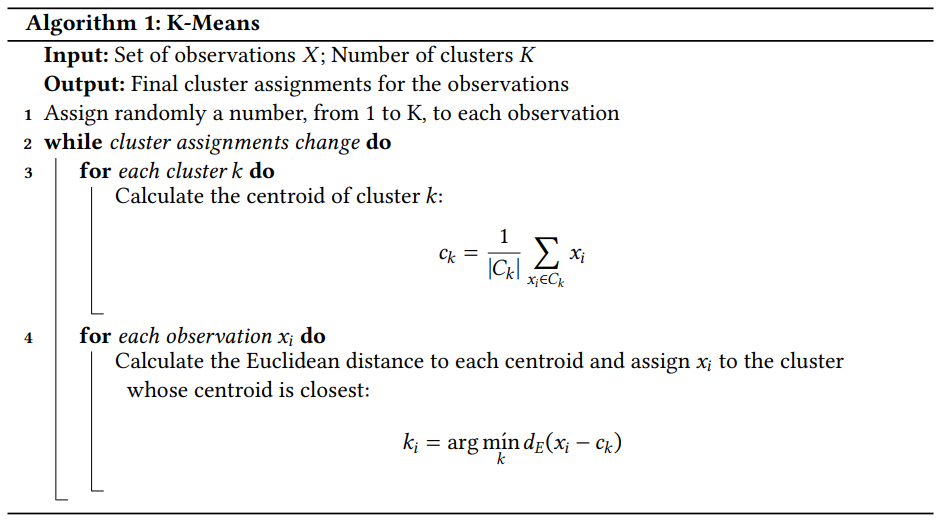

In [8]:
def k_means(X, K, iteration=20):
    """
    Function implementing the K-means algorithm for clustering.

    Inputs:
        X (array-like): Data set.
        K (int): Number of clusters.
        iteration (int, optional): Number of iterations. Default is 20.

    Returns:
        dict: A dictionary with cluster allocations, cluster scores (inertias), and centroids at each iteration.

    Author:
        Rodrigo J. Kang
    """
    n, p = X.shape  # Number of observations and dimensions
    center = np.zeros((K, p))  # Initialization of centroids
    y = np.random.choice(K, n, replace=True)  # Initial random cluster allocation
    scores = []  # List to store Sum of Squared Distances (inertias)

    # Loop for algorithm iterations
    for h in range(iteration):
        for k in range(K):
            if np.sum(y == k) == 0:  # Handling special case if a cluster has no allocations
                center[k, 0] = np.inf
            else:
                for j in range(p):
                    center[k, j] = np.mean(X[y == k, j])  # Update centroids

        S_total = 0  # Initialization of total Sum of Squared Distances (inertia)

        # Loop to calculate cluster allocation for each observation
        for i in range(n):
            S_min = np.inf  # Initialization of minimum distance
            for k in range(K):
                S = np.sum((X[i,] - center[k,])**2)  # Calculate distance to centroid
                if S < S_min:
                    S_min = S
                    y[i] = k  # Assign observation to cluster with nearest centroid
            S_total += S_min  # Accumulate inertia

        scores.append(S_total)  # Store inertia for this iteration

    return {'clusters': y, 'scores': scores, 'centroids': center}

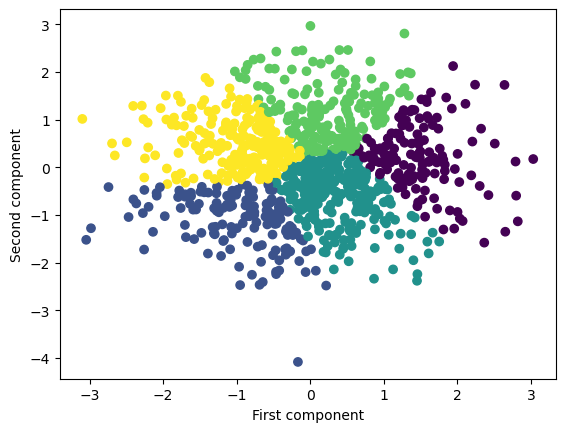

In [9]:
np.random.seed(115)
n = 1000  # Number of observations
K = 5     # Number of clusters
p = 2     # Number of dimensions

X = np.random.randn(n, p)  # Data generation

clusters = k_means(X, K)['clusters']  # Getting cluster for each sample

# Change color for each cluster and draw a point
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()